---
---

# Clustering Analysis on the Physical Characteristics of Penguins
---
---

# Preliminaries
---

## Pitch Summary
<div class="alert alert-block alert-warning">
Present a short summary of the pitch!

(Up to 5 bullet points, this cell)
</div>

* GEOMAR Institute is committed to safeguarding wildlife including that of penguins who are particularly vulnerable due to various factors.

* However, their conservation strategies lack precision due to insufficient insights into the physical diversity of different penguin species.

* As a data scientist, I propose conducting a exploratory analysis viz. clustering on the penguin dataset in an attempt to solve this problem.

* The dataset is expected to yield various clusters based on the physical characteristics of the penguins.

* The resultant insight from this research will help streamline GEOMAR's strategies and allow it to allocate resources appropriately, run awareness campaigns and enhance proposals for grants and funding.

## Dataset Reference

<div class="alert alert-block alert-warning">
Present the origin of the dataset, including e.g.
    
* the source where you got it from (link to the repository),
* the author(s),
* the license,
* the purpose for which it was collected!

(Text/bullet points, this cell)
</div>

* Source URL: https://www.kaggle.com/datasets/youssefaboelwafa/clustering-penguins-species

* Author: Youssef Aboelwafa

* License: GNU Lesser General Public License 3.0

* Purpose: Running a clustering analysis in order to help GEOMAR Institute with their penguin conservation efforts.

## Dataset Suitability

<div class="alert alert-block alert-warning">
Explain why the dataset is suitable for the pitched task!
    
(Up to 3 bullet points, this cell)
</div>

* Keeping in mind the objective to get insights based on the physical attributes of penguins, the dataset contains 344 specimen data in rows and 4 numerical dimensions viz. culmen_length, culmen_depth, flipper_length, body_mass and 1 categorical dimension called sex.

* The first three dimensions have been measured in mm, while the body_mass dimension has been measured in grams. The sex dimensions is recorded either as MALE or FEMALE depending upon the sex of the bird it was obtained from.

* This dataset is perfect for pitched task, since the relevant data for clustering is available and the dataset does not pre-emptively specify the presence of any particular species of penguins, it is highly suitable for an exploratory analysis whereby clusters, if formed, can be analysed without bias.


# Imports and Settings
---
<div class="alert alert-block alert-warning">
Use the following code cell to organize all imports and global settings.
Do not remove the pandas option.
    
(Commented code, in the next cell)
</div>

In [1]:
import pandas as pd
# make pandas display ALL columns of a dataframe
pd.options.display.max_columns = None

In [2]:
import numpy as np

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import SilhouetteVisualizer

# for standardization
from sklearn.preprocessing import StandardScaler

# for k-Means
from sklearn.cluster import KMeans

# for dimensionality reduction
from sklearn.decomposition import PCA

# to deal with outliers
from scipy.stats import zscore

# The Data
---

## The Raw Data
<div class="alert alert-block alert-warning"> 
Load the data and present a couple of samples. Call the dataset variable "raw".

(Commented code, add cells)
</div>


In [3]:
raw = pd.read_csv('data/penguins.csv')  #... loading the dataset and storing it in a variable called 'raw'
raw.head()  #... presenting a couple of samples

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


<div class="alert alert-block alert-warning"> 
Explain the dataset with all its features.
    
* The features should be described in the following table. The range is the set of possible values that a feature can take, e.g. "red, green, blue", "$\mathbb{R}$", "$1,2,...,12$".
* You may describe each feature individually or groups of features, if many features are similar (whatever is easier to explain.)

(Text/bullet points + table, this cell)
</div>

* The dataset consists of physical characteristics of 344 penguins. 

* It has five features viz. the measurements of the penguins' culmen length and depth, the length of  the flipper, the body mass of the birds and finally their sex.

* The first four dimensions are numerical, where the first three are measured in millimeters while the body mass is measured in grams.

* The sex of the penguins is labeled as either male or female and is a cateogrical feature.

* The dataset does not provide any insight as to the species of any of the 344 data samples of penguins and is thus ideal for the purpose of clustering.


| Feature | Range  | Explanation |
|---------|--------|-------------|
|culmen_length_mm|32.10 - 59.60|Length of the culmen of a penguin measured in mm, float values.|
|culmen_depth_mm|13.10 - 21.50|Depth of the culmen of a penguin measured in mm, float values.|
|flipper_length_mm|-132.00 - 5000.00|Length of the flipper of a penguin measured in mm, float values.|
|body_mass_g|2700 - 6300|Weight of a penguin measured in grams, float values|
|sex|MALE or FEMALE|Sex of a penguin, binary, either male or female|

<div class="alert alert-block alert-warning"> 
<b>Initial Data Analysis (IDA)</b>: Present relevant quantities about the data.
    
(Commented Code + text/bullet points, add cells)
</div>

In [4]:
# 1 Shape of the dataset
raw.shape

(344, 5)

In [5]:
# 2 Dataset information
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [6]:
# 3 Null values
raw.isna().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

<div class = 'alert alert-block alert-info'>

a. The dataset has 344 rows of data collected from individual penguin specimen and 5 columns representing the features.

b. Four of the five features are numerical with dtype 'float', three of which are measured in 'mm' and one in grams.

c. The last feature is of dtype 'object' with binary values either 'male' or 'female'.

d. Each of the numerical features have 2 null values whereas the feature 'sex' has 9 null values.

</div>

## Preprocessing

<div class="alert alert-block alert-warning"> 
<b>Initial Data Analysis (IDA)</b>: 
Conduct necessary analyses of the data quality and transform the data as needed.
Explain the necessity for transformations!
    
(Commented code + text/bullet points, add cells)
</div>

In [7]:
# 1. Drop categorical values
raw.drop('sex', axis=1, inplace=True)

# 2. Drop null values
raw.dropna(inplace=True)

In [8]:
# 3. Dealing with the outliers

# 3.1 Detecting outliers
z_scores = zscore(raw)
outlier = np.where(np.abs(z_scores) > 3)[0]

# 3.2 Filtering outliers
mask = np.ones(len(raw), dtype=bool)
mask[outlier] = False
raw_filt = raw[mask]

<div class = 'alert alert-block alert-info'>

i. Since the analysis is to be conducted on the physical characteristics of penguins, the feature 'sex' can be droppped.

ii. The dataset has a few null values which can be dropped in order to preserve the reliability of the data and not skew it by incorporating the mean from other data points.

iii. The dataset also has outliers which have been dealt with in this step.

</div>

<div class="alert alert-block alert-warning"> 
Call the final dataset "data" and present a couple of samples.

(Commented code, add a cell)
</div>

In [9]:
# 4. Call the final dataset "data" and present a couple of samples.
data = raw_filt
data.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


<div class="alert alert-block alert-warning"> 
<b>Initial Data Analysis (IDA)</b>: Present relevant quantities about the transformed data.
    
(Commented Code + text/bullet points, add cells)
</div>

In [10]:
# 1. Shape of the final dataset
data.shape

(341, 4)

In [11]:
# 2. Final dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 341 entries, 0 to 343
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   341 non-null    float64
 1   culmen_depth_mm    341 non-null    float64
 2   flipper_length_mm  341 non-null    float64
 3   body_mass_g        341 non-null    float64
dtypes: float64(4)
memory usage: 13.3 KB


In [12]:
# 3. Null values in the final dataset
data.isna().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
dtype: int64

In [13]:
print(data)

     culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
0                39.1             18.7              181.0       3750.0
1                39.5             17.4              186.0       3800.0
2                40.3             18.0              195.0       3250.0
4                36.7             19.3              193.0       3450.0
5                39.3             20.6              190.0       3650.0
..                ...              ...                ...          ...
338              47.2             13.7              214.0       4925.0
340              46.8             14.3              215.0       4850.0
341              50.4             15.7              222.0       5750.0
342              45.2             14.8              212.0       5200.0
343              49.9             16.1              213.0       5400.0

[341 rows x 4 columns]


<div class = 'alert alert-block alert-info'>

After preprocessing the raw dataset:

a. The final dataset has 341 rows of data collected from individual penguin specimen and 4 columns representing the features.

b. All the four features are numerical with dtype 'float', three of which are measured in 'mm' and one in 'grams'.

c. The final dataset has no null values.

</div>

# Exploratory Data Analysis (EDA) 
---

<div class="alert alert-block alert-warning"> 
Present 3 highlights from the exploratory data analysis (Task 4).

(Commented code + text/bullet points, add cells)

In [14]:
# 1. Statistics
data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,341.000000,341.000000,341.000000,341.000000
mean,43.927566,17.142229,199.979472,4201.612903
std,5.466610,1.970751,22.870020,803.128740
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.200000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


<Axes: >

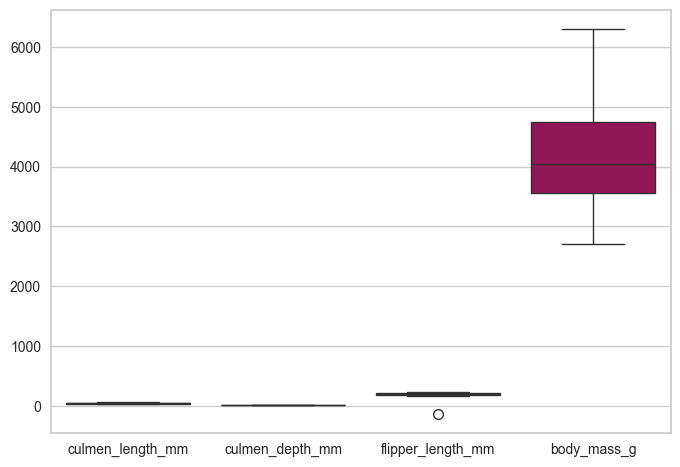

In [15]:
# 2. Distributions
sns.boxplot(data)

<div class = 'alert alert-block alert-info'>

* Distribution of features.

</div>

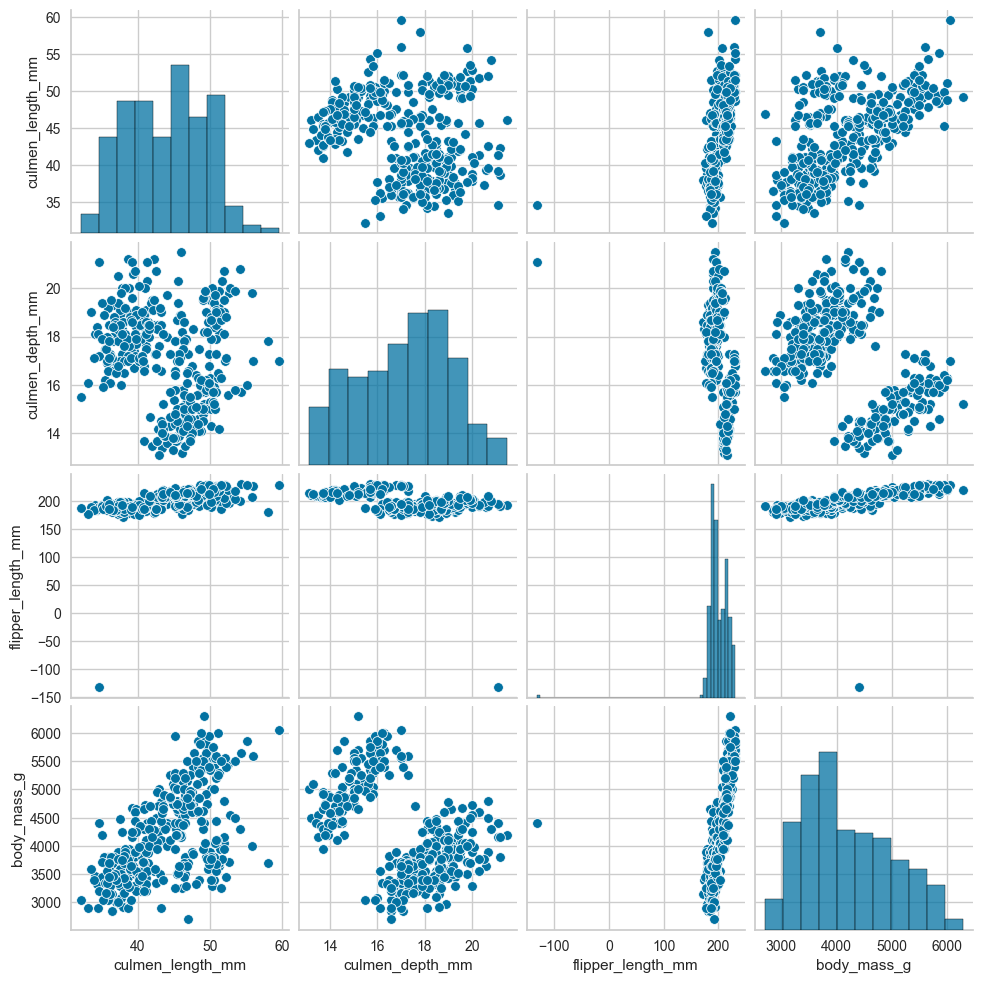

In [16]:
# 3. Feature relations
sns.pairplot(data)

<div class = 'alert alert-block alert-info'>

* Since the dataset is 4-dimensional, it cannot be plotted in its entirety.

* The simplest way to visualize such data is to select two dimensions.

* A pairplot helps us determine which two dimensions would be the most helpful.

</div>

# Clustering 1 -- Plain Data
---


<div class="alert alert-block alert-warning"> 
<b>Choice of Algorithm</b>: 
Given the situation in the pitch and the results from the above analyses. Which algorithm (chosen from those discussed in the lectures) would YOU choose for the clustering? Explain!
    
(Choice + 1-3 bullet points)
</div>

CHOICE: DBSCAN

* DBSCAN is better for an exploratory data analysis since it can adapt to the data and discover the no.of clusters by itself as opposed to k-Means.

* DBSCAN would give better results by accounting for varying densities.

* DBSCAN can also account for outliers whereas k-Means assumes spherical clusters.



<div class="alert alert-block alert-warning"> 
<b>Clustering with k-Means</b>: 
For the sake of the exam, use k-Means for the clustering (even if above you argumented for a different algorithm). Conduct ALL necessary steps to create a most helpful and meaningful clustering and discuss its quality. Use appropriate diagrams to demonstrate the results. 
    
(Commented code + text/bullet points, add cells)
</div>

In [17]:
# 1. Standardization
scaler = StandardScaler()
data_sc = scaler.fit_transform(data)  #... calling the standardized dataset as 'data_sc'
data_sc = pd.DataFrame(data_sc, index=data.index, columns=data.columns)  #... converting back to pd DataFrame
data_sc.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,-0.884398,0.791607,-0.831104,-0.563143
1,-0.811119,0.130991,-0.612156,-0.500795
2,-0.664561,0.435891,-0.218049,-1.186623
4,-1.324072,1.096507,-0.305628,-0.937231
5,-0.847759,1.757124,-0.436997,-0.687839


<div class = 'alert alert-block alert-info'>

* The dataset has been standardized for best clustering among features of varying ranges.

</div>

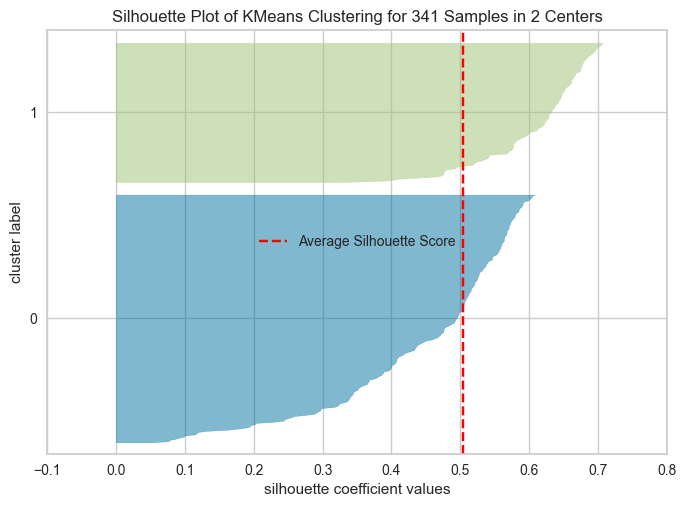

0.5043864687431496


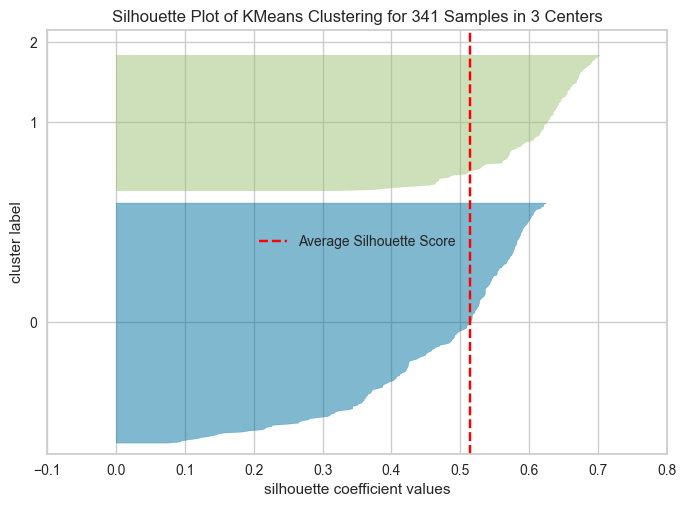

0.5133092958832892


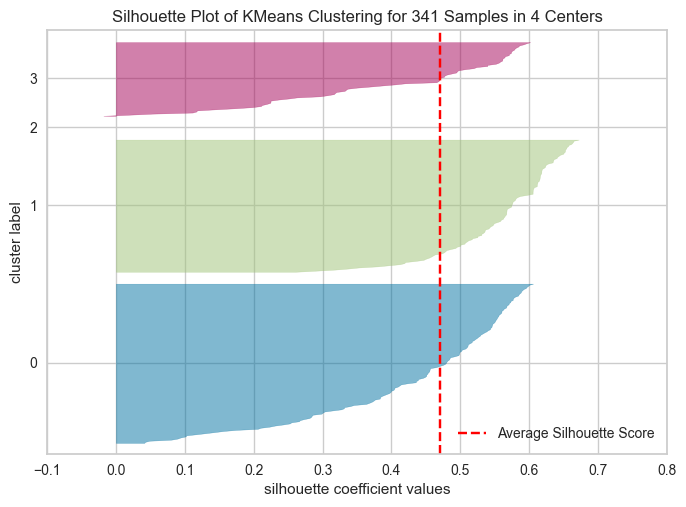

0.4707733021635536


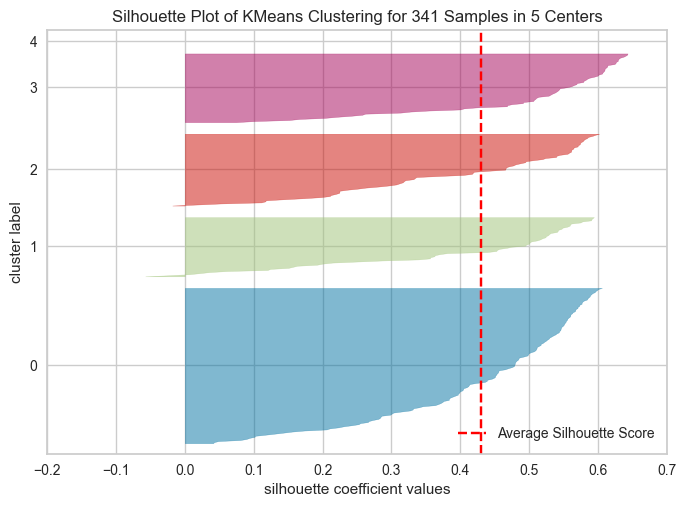

0.43056861296658977


In [18]:
# 2. Find the optimal 'k' using silhouette visualizer
k_vals = range(2,6)
for k in k_vals:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20, init='k-means++', max_iter=300, tol=0.0001)
    viz = SilhouetteVisualizer(kmeans, colors='yellowbrick')
    viz.fit(data_sc)
    viz.show()
    print(viz.silhouette_score_)

<div class = 'alert alert-block alert-info'>

* The optimal value of 'K' was found using the silhoutte visualizer.

* Although the silhoutte score for K=3 was slightly better than K=2, K=2 was chosen since at K=3 the third cluster seems to be a single point cluster and the clustering at K=2 is comparatively better.

</div>

## For K=2

In [19]:
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=20, init='k-means++', max_iter=300, tol=0.0001)
clusters_2 = kmeans_2.fit_predict(data_sc)
centroids_2 = kmeans_2.cluster_centers_

### Body Mass vs Culmen Depth

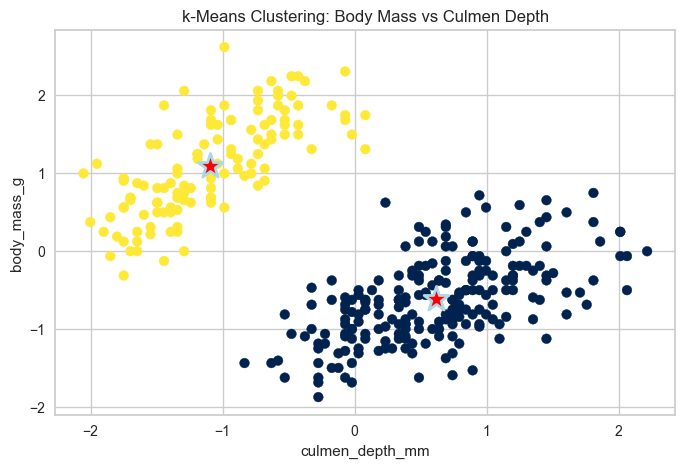

In [20]:
plt.figure(figsize=(8, 5))
plt.scatter(data_sc.culmen_depth_mm, data_sc.body_mass_g, c=clusters_2, cmap='cividis')
plt.scatter(centroids_2[:, 1], centroids_2[:, 3], marker='*', c='red', edgecolors='lightblue', linewidths=2, s=350)

plt.xlabel('culmen_depth_mm')
plt.ylabel('body_mass_g')
plt.title('k-Means Clustering: Body Mass vs Culmen Depth')
plt.show()

<div class = 'alert alert-block alert-info'>

* k-means was used to create 2 clusters.

* The two clusters can be visualized.

* They appear as compact shapes around their centers.

* A clear separation between the clusters can be seen in the scatter plot of Body Mass vs Culmen Depth.

</div>

# Dimensionality Reduction
---
<div class="alert alert-block alert-warning"> 
<b>PCA</b>: 
Use PCA to transform the dataset. Analytically choose a reasonable number of components. Report the preserved variance.

(Commented code + text/bullet points, add cells)
</div>

In [21]:
# 1. Covariance analysis on the scaled dataset

data_sc.cov().round(2)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.00,-0.24,0.48,0.60
culmen_depth_mm,-0.24,1.00,-0.45,-0.48
flipper_length_mm,0.48,-0.45,1.00,0.53
body_mass_g,0.60,-0.48,0.53,1.00


<div class = 'alert alert-block alert-info'>

* 4-dimensional data was investigated.

* Non-zero correlation between the features can be observed.

* Conclusion: Features are correlated.

</div>

In [22]:
# 2. Initializing PCA variable on all the features of the scaled data
pca_var = PCA()
df_pca = pca_var.fit_transform(data_sc)
df_pca = pd.DataFrame(df_pca, index=data.index)
df_pca.round()

,0,1,2,3
0,-2.0,0.0,-0.0,0.0
1,-1.0,-0.0,-0.0,0.0
2,-1.0,-0.0,1.0,-0.0
4,-2.0,-0.0,1.0,0.0
5,-2.0,1.0,1.0,1.0
...,...,...,...,...
338,2.0,-1.0,-0.0,-0.0
340,2.0,-1.0,-0.0,-0.0
341,2.0,0.0,-0.0,1.0
342,2.0,-1.0,-0.0,0.0


In [23]:
# 3. Covariance analysis on the PCA results
df_pca.cov().round(2)

,0,1,2,3
0,2.4,0.00,0.0,-0.00
1,0.0,0.78,0.0,-0.00
2,0.0,0.00,0.5,0.00
3,-0.0,-0.00,0.0,0.34


<div class = 'alert alert-block alert-info'>

* The transformed data shows no covariance, thus no correlation among different components.

* The components are ordered by their variance (highest to lowest, see main diagonal).

* The data still has 4 dimensions, i.e. dimensionality has not yet been reduced.

</div>

[0.59718487 0.19356254 0.12434383 0.08490876]
[0.59718487 0.79074741 0.91509124 1.        ]


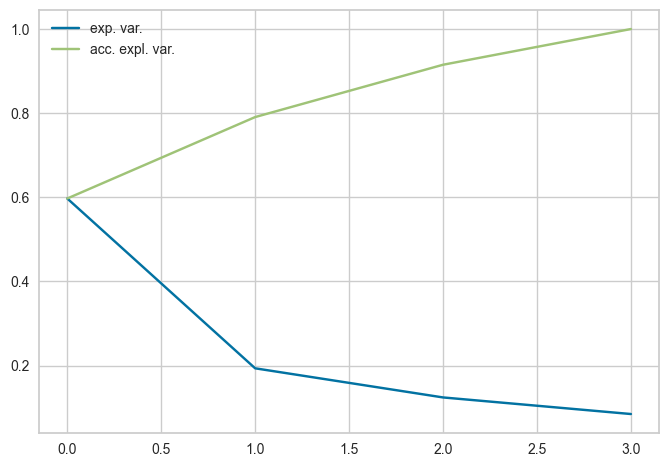

In [24]:
# 4. Analyzing explained variance
exp_var = pca_var.explained_variance_ratio_
print(exp_var)
plt.plot(exp_var, label='exp. var.')
plt.plot(np.add.accumulate(exp_var), label='acc. expl. var.')
plt.legend()
print(np.add.accumulate(exp_var))

In [25]:
# 5. Importing pca library for specific tasks
%pip install pca
from pca import pca

Note: you may need to restart the kernel to use updated packages.


In [26]:
# 6. Initilizing the pca model and using it on the scaled data
model = pca(n_components=4)
results = model.fit_transform(data_sc)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed on the [4] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


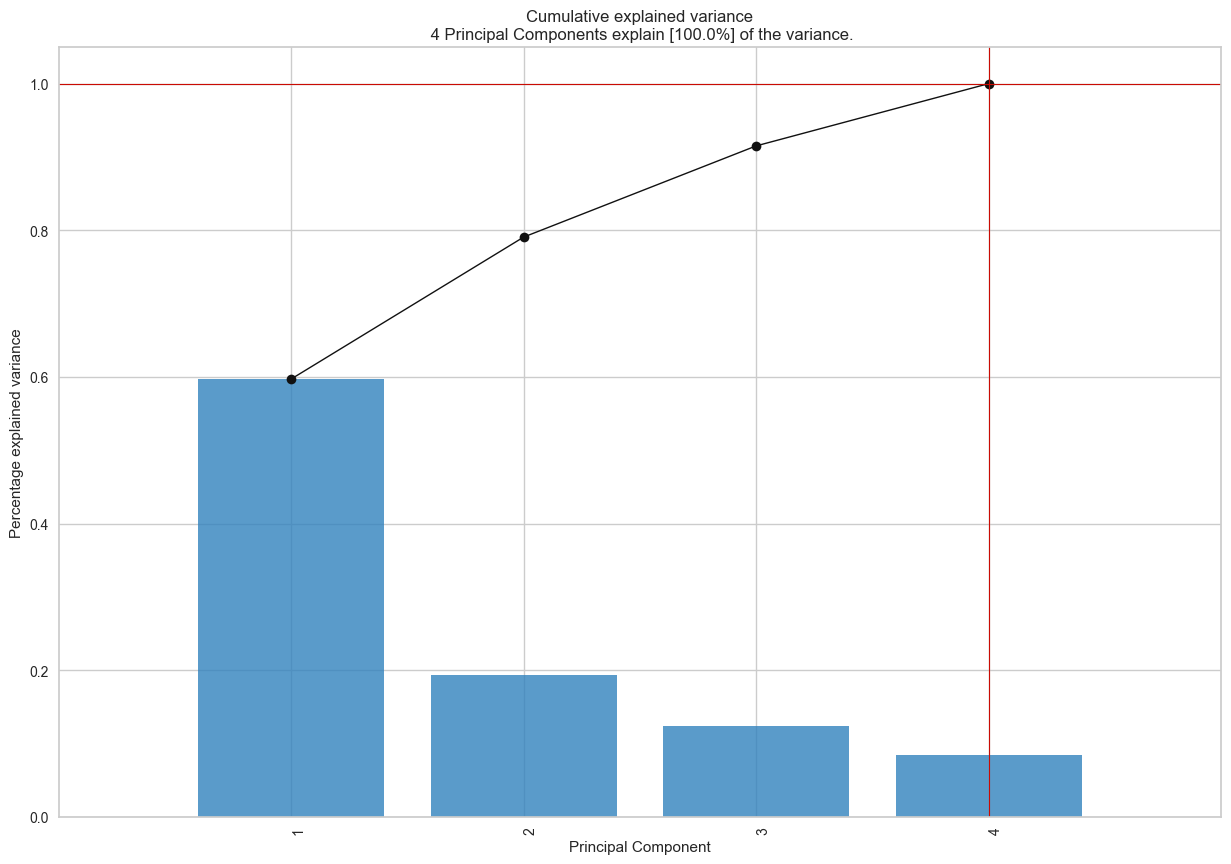

In [27]:
# 7. PCA Explained variance plot
fig, ax = model.plot()

[scatterd] >INFO> Create scatterplot


[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


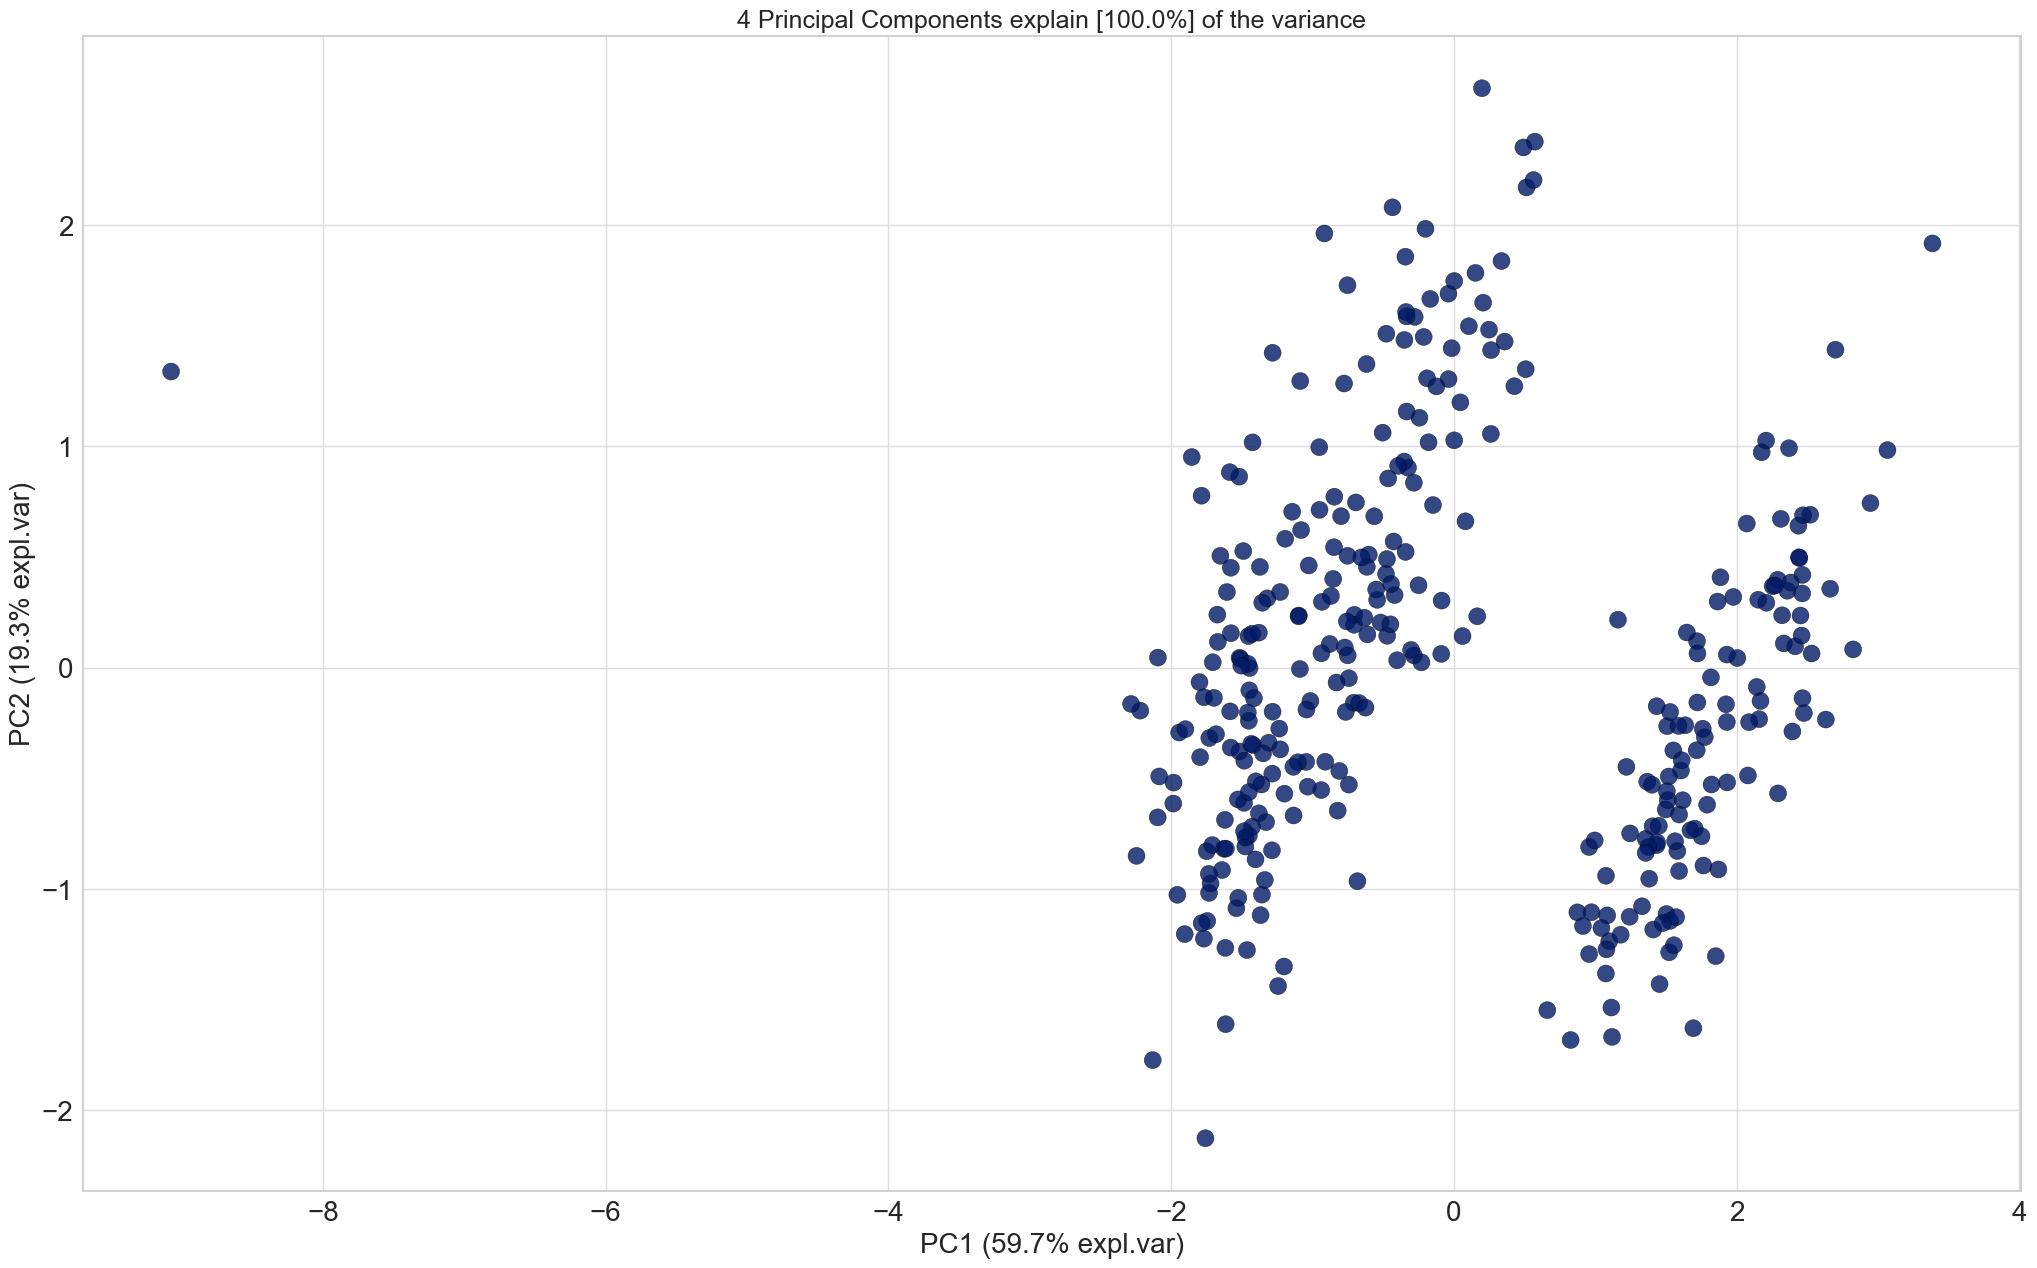

In [28]:
# 8. PCA scatter plot
fig, ax = model.scatter(legend=False)

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


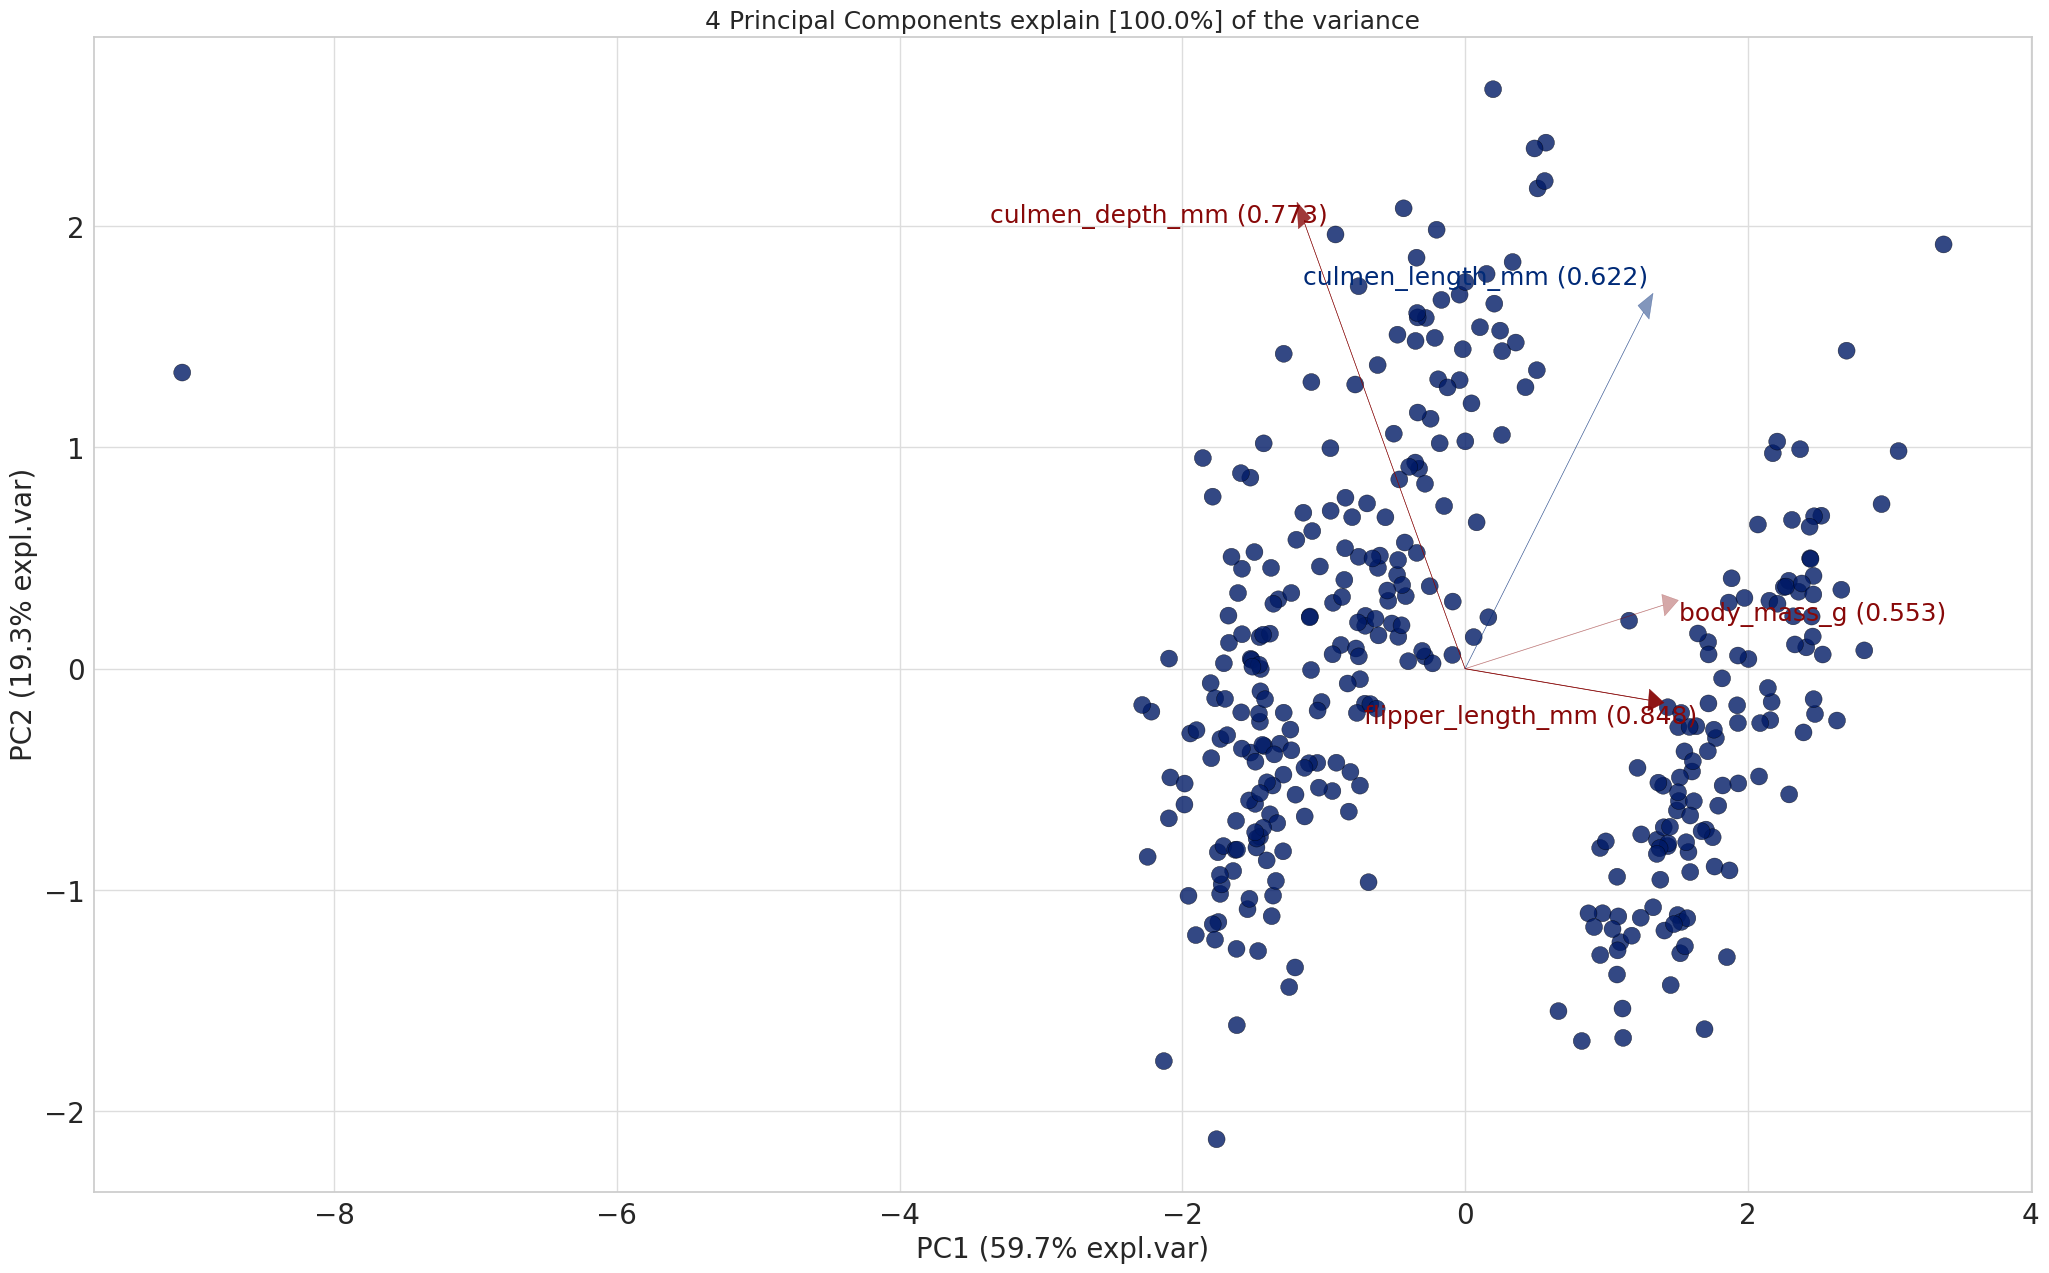

In [29]:
# 9. Biplot with no. of original features (plot data and loadings)
fig, ax = model.biplot(n_feat=4, legend=False)

<div class = 'alert alert-block alert-info'>

* Annotated are the highest (absolute value) loadings (the weight for the component a feature influences the most).

* Red arrows indicate features that are the ones most important for a particular component.

* Angles between loading vectors indicate correlation: small angles -> high correlation, angles near 90 degrees -> low correlation.

* Length of the vector indicates the strength of the feature with respect to the currently choosen components (e.g. culmen_depth_mm with 0.49 and 0.62 (long) vs. flipper_length_mm with 0.52 and 0.06 (short)); vectors are scaled for better readability.

</div>

In [30]:
model.results['loadings'].round(2)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
PC1,0.49,-0.44,0.52,0.55
PC2,0.62,0.77,-0.06,0.11
PC3,-0.18,0.27,0.85,-0.42
PC4,-0.59,0.37,0.11,0.71


In [31]:
model.results['PC']

,PC1,PC2,PC3,PC4
0,-1.516636,0.044676,-0.095408,0.324625
1,-1.045465,-0.425525,-0.126937,0.102086
2,-1.282961,-0.198700,0.550232,-0.314702
4,-1.799714,-0.065142,0.668703,0.486751
5,-1.785290,0.777270,0.544236,0.618599
...,...,...,...,...
338,1.870607,-0.911243,-0.436862,-0.299021
340,1.672826,-0.734263,-0.265200,-0.203678
341,2.463230,0.335653,-0.403762,0.507569
342,1.592803,-0.663329,-0.438055,0.359257


In [32]:
model.results['explained_var']

array([0.59718487, 0.79074741, 0.91509124, 1.        ])

<div class = 'alert alert-block alert-info'>

* The first two principal components already account for about 79% of the covariance.

* Hence the number of principal components will be 2.

</div>

/var/folders/j4/zzbyrmh10250nzjc681c0_x40000gn/T/ipykernel_70727/2314645979.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], cmap='viridis')


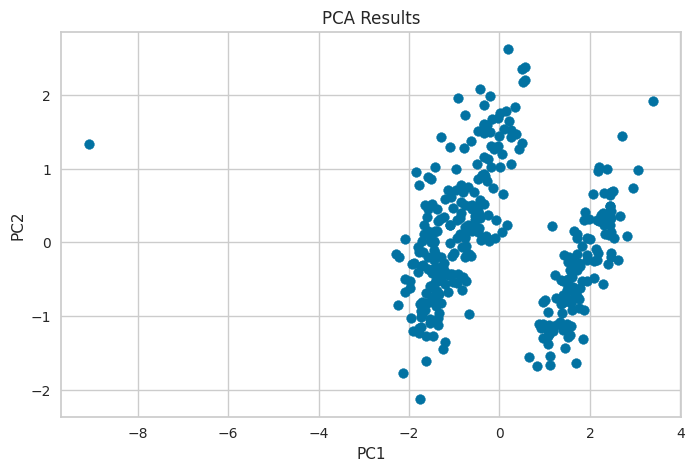

In [33]:
# 5. Visualizing PCA results
plt.figure(figsize=(8, 5))
plt.scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Results')
plt.show()

# Clustering 2 -- PCA-transformed Data
---
<div class="alert alert-block alert-warning"> 
<b>Clustering with k-Means</b>: 
On the PCA-transformed data, conduct ALL necessary steps to create a most helpful and meaningful clustering and discuss its quality. Use appropriate diagrams to demonstrate the results. 

(Commented code + text/bullet points, add cells)
</div>

<div class = 'alert alert-block alert-info'>

* As mentioned in the previous step, the no. of components will be 2 as they show very high covariance.

</div>

In [34]:
# 1. Initializing model for 2 components
model_2 = pca(n_components=2)
results_2 = model_2.fit_transform(data_sc)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed on the [4] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


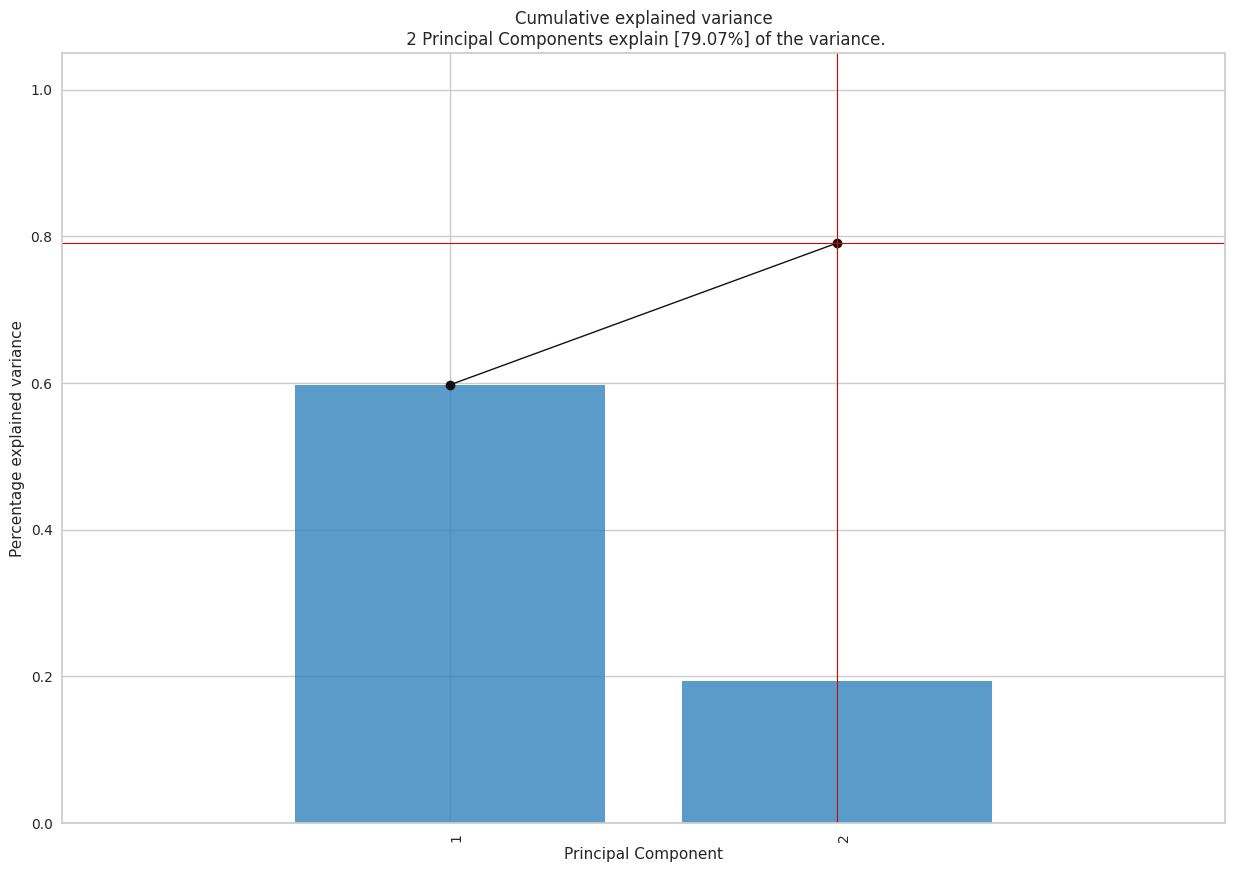

In [35]:
# 2. Explained variance for 2 PCs
fig, ax = model_2.plot()

[scatterd] >INFO> Create scatterplot


[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


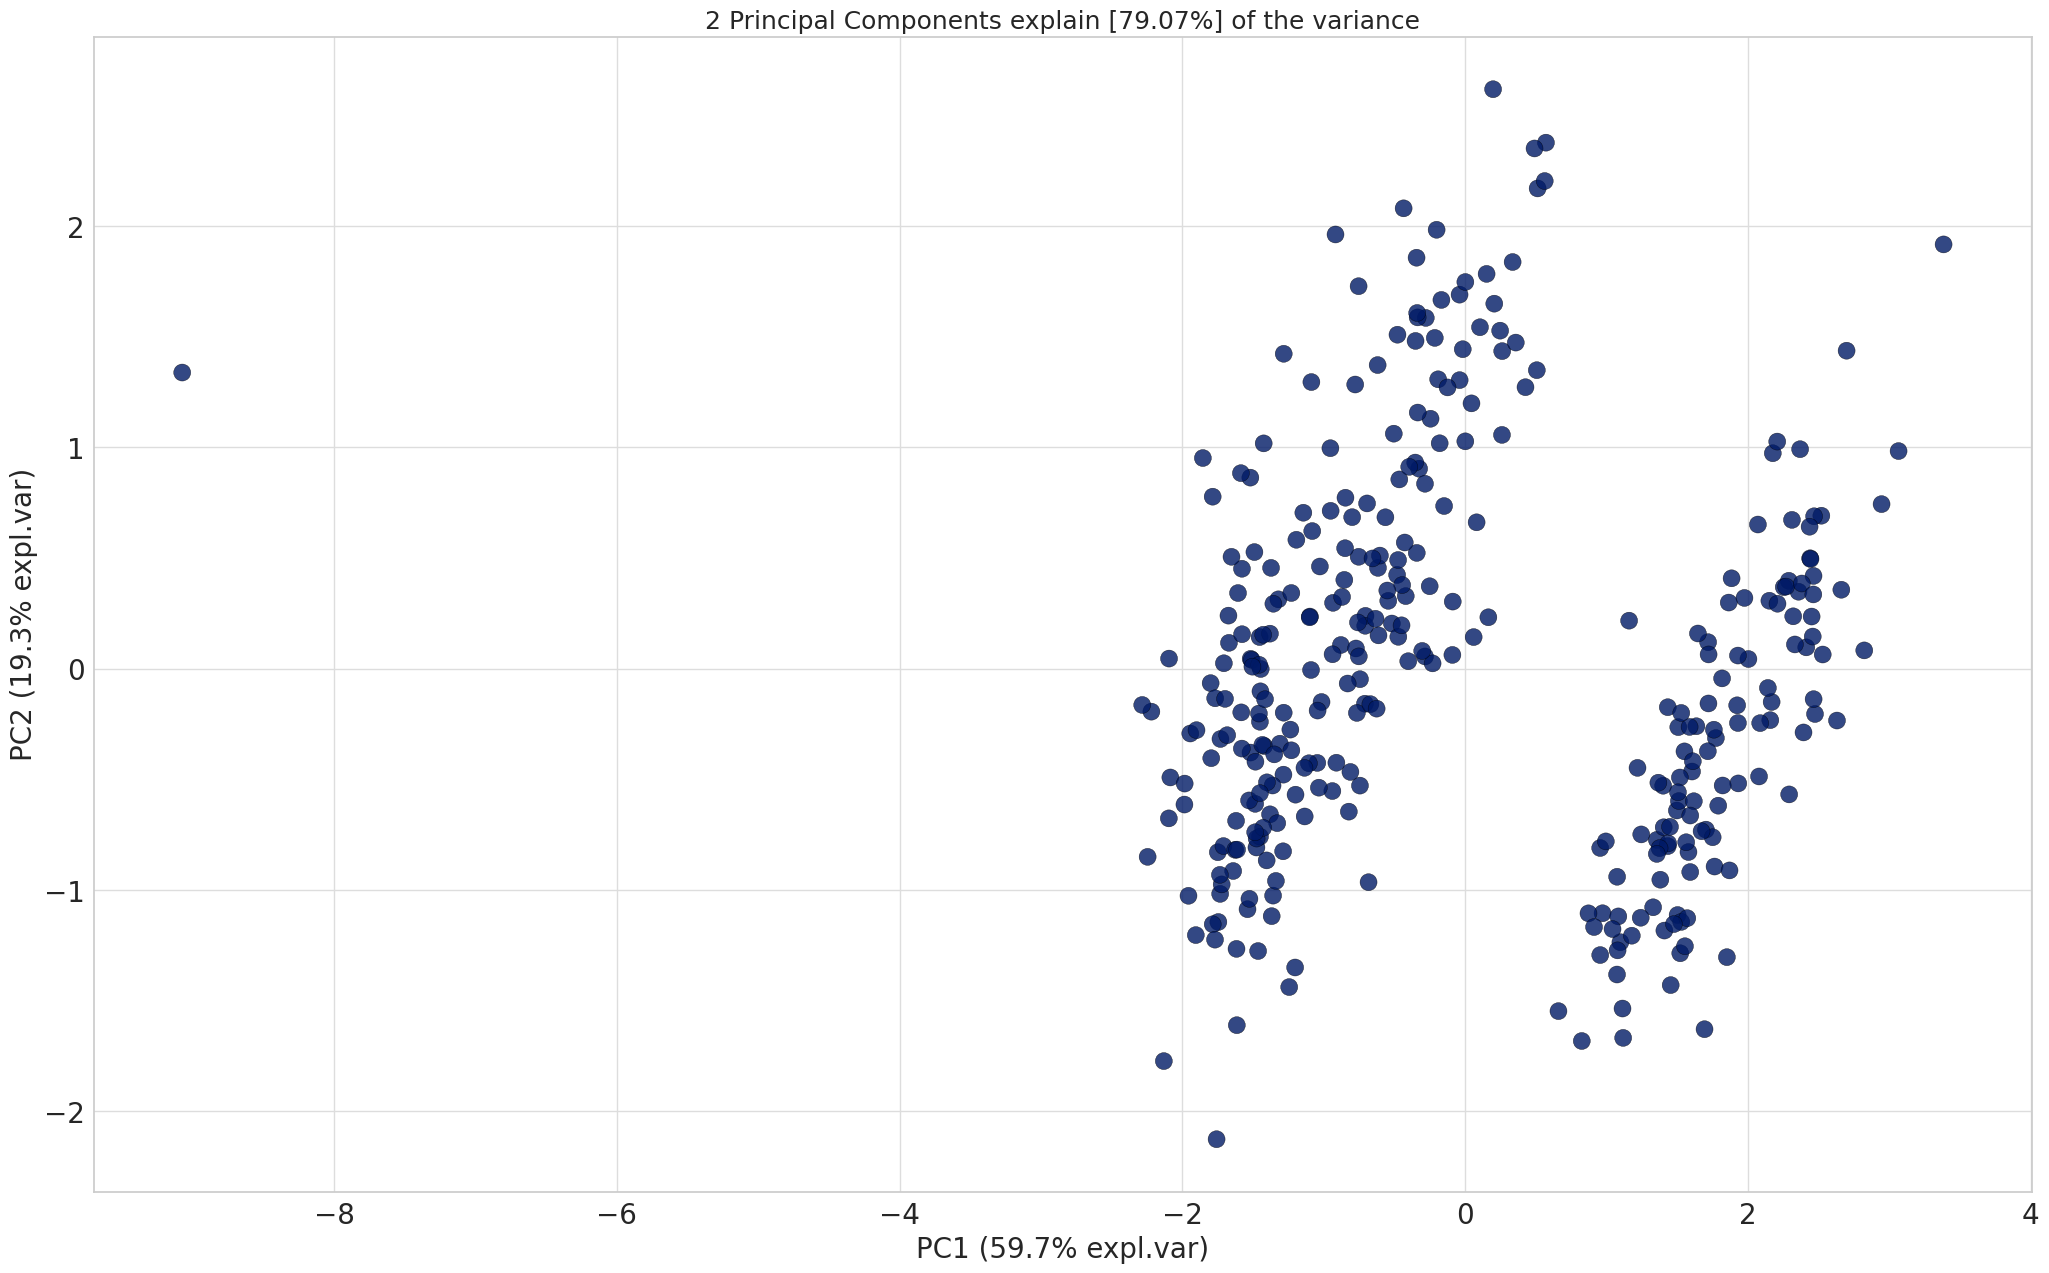

In [36]:
# 3. Scatter plot for 2 PCs
fig, ax = model_2.scatter(legend=False)

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


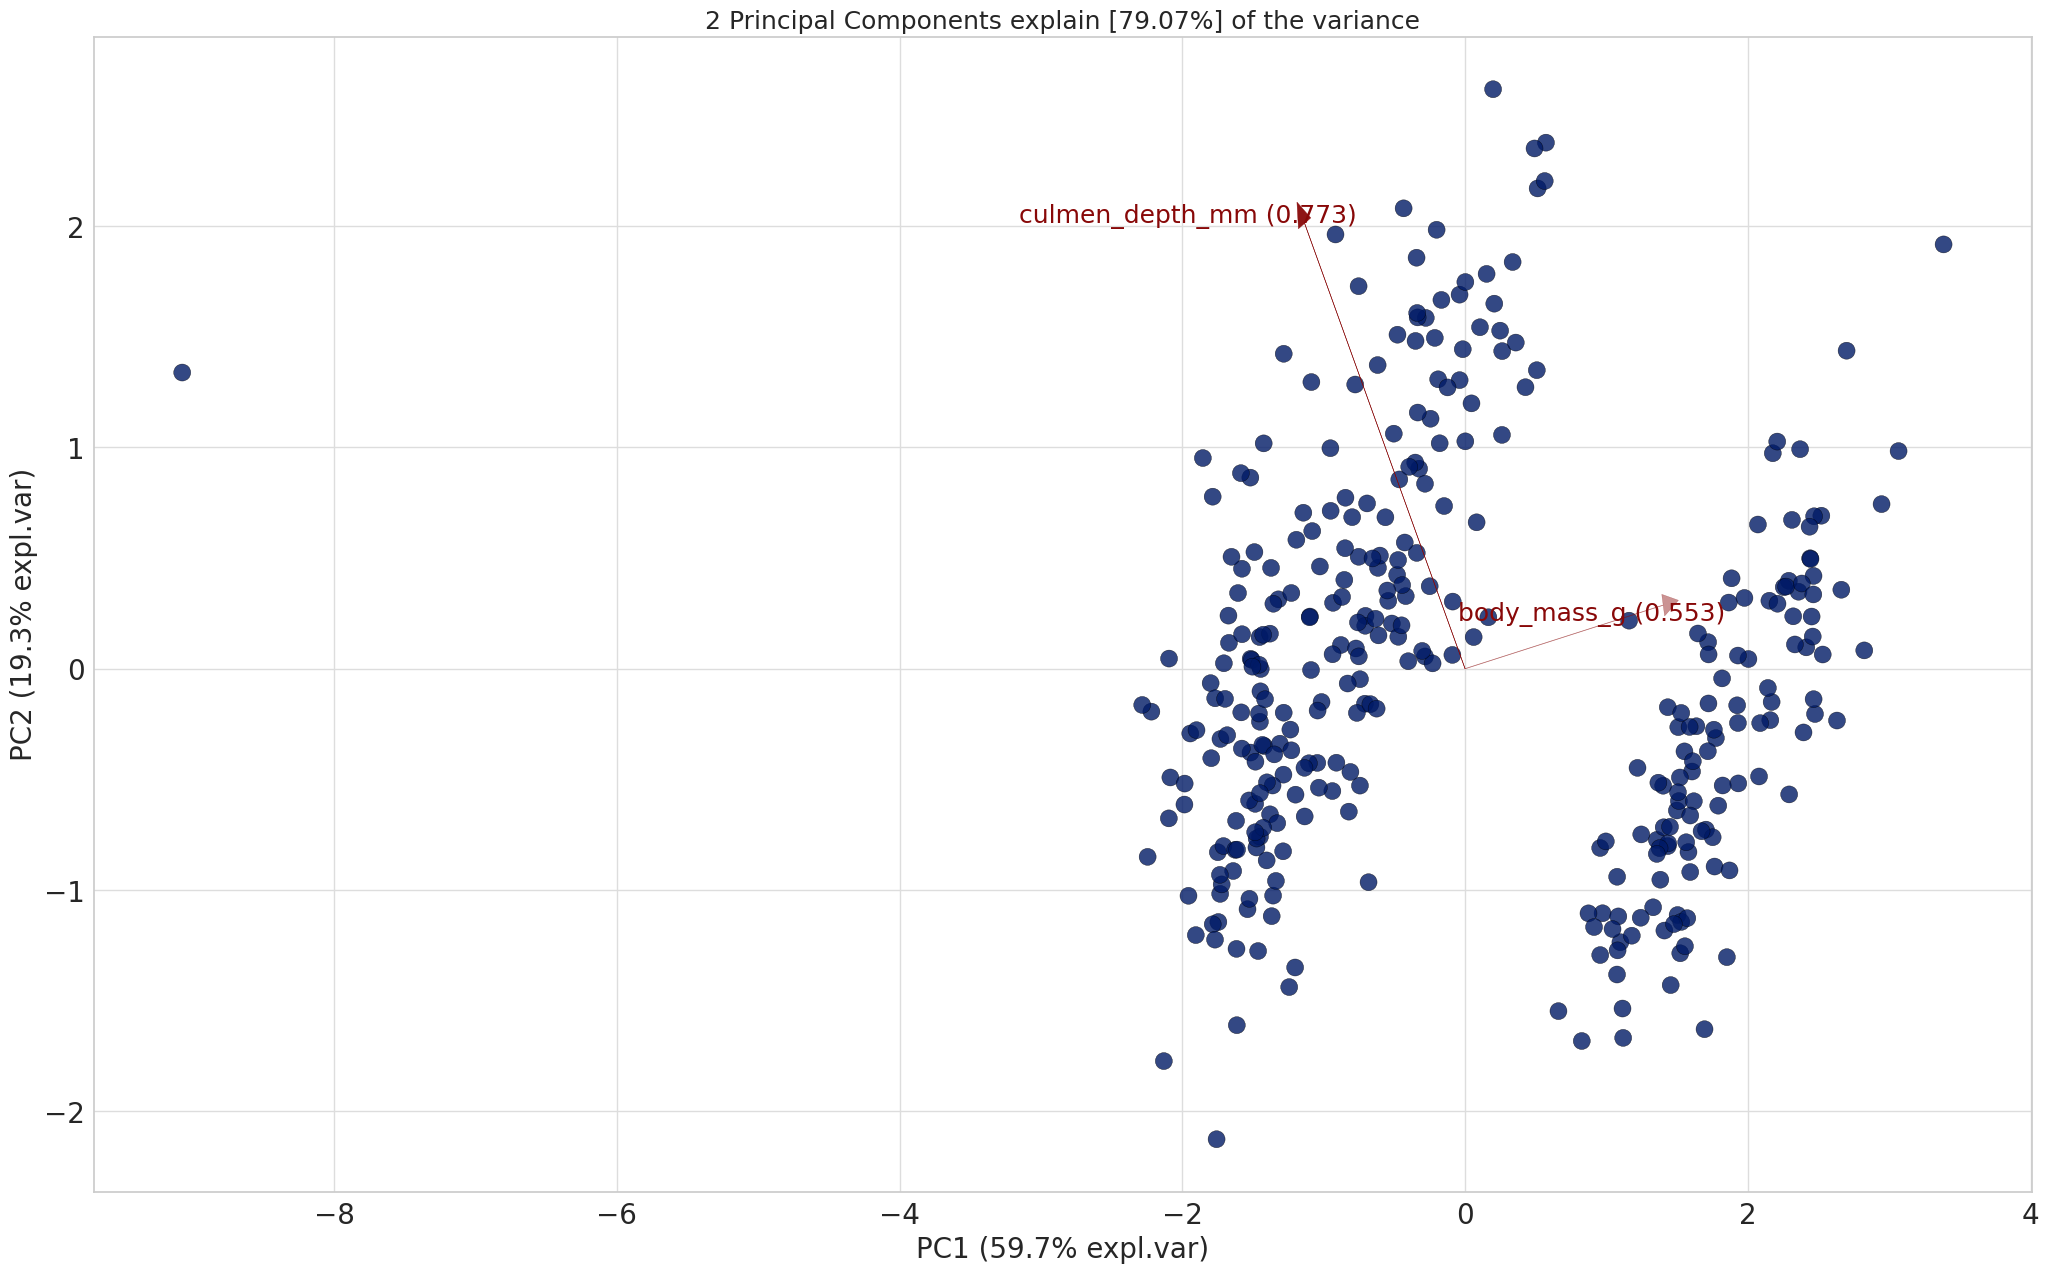

In [37]:
# 4. Biplot for 2 PCs
fig, ax = model_2.biplot(n_feat=2, legend=False)

In [38]:
model_2.results['loadings'].round(2)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
PC1,0.49,-0.44,0.52,0.55
PC2,0.62,0.77,-0.06,0.11


In [39]:
model_2.results['PC']

,PC1,PC2
0,-1.516636,0.044676
1,-1.045465,-0.425525
2,-1.282961,-0.198700
4,-1.799714,-0.065142
5,-1.785290,0.777270
...,...,...
338,1.870607,-0.911243
340,1.672826,-0.734263
341,2.463230,0.335653
342,1.592803,-0.663329


In [40]:
model_2.results['explained_var']

array([0.59718487, 0.79074741])

## Conducting k-Means clustering

In [41]:
# 5. Initializing PCA variable on only 2 components of the scaled data
pca_var_2 = PCA(n_components=2)
data_pca = pca_var_2.fit_transform(data_sc)
data_pca = pd.DataFrame(data_pca, index=data.index)
data_pca.round()

,0,1
0,-2.0,0.0
1,-1.0,-0.0
2,-1.0,-0.0
4,-2.0,-0.0
5,-2.0,1.0
...,...,...
338,2.0,-1.0
340,2.0,-1.0
341,2.0,0.0
342,2.0,-1.0


In [42]:
pca_var_2.get_covariance()

array([[ 1.02745087, -0.2484998 ,  0.48461845,  0.55810663],
       [-0.2484998 ,  1.00831528, -0.45999958, -0.44525757],
       [ 0.48461845, -0.45999958,  0.9469773 ,  0.56175987],
       [ 0.55810663, -0.44525757,  0.56175987,  1.02902125]])

<div class = 'alert alert-block alert-info'>

* The features are no longer interpretable in the context of physical characteristics of penguins.

</div>

In [43]:
# 6. Covariance analysis on 2 PCs
data_pca.cov().round(2)

,0,1
0,2.4,0.00
1,0.0,0.78


<div class = 'alert alert-block alert-info'>

* The transformed data shows no covariance, thus no correlation among different components.

* The components are ordered by their variance (highest to lowest, see main diagonal).

* The number of components has been successfully reduced from 4 to 2.

</div>

[0.59718487 0.19356254]
[0.59718487 0.79074741]


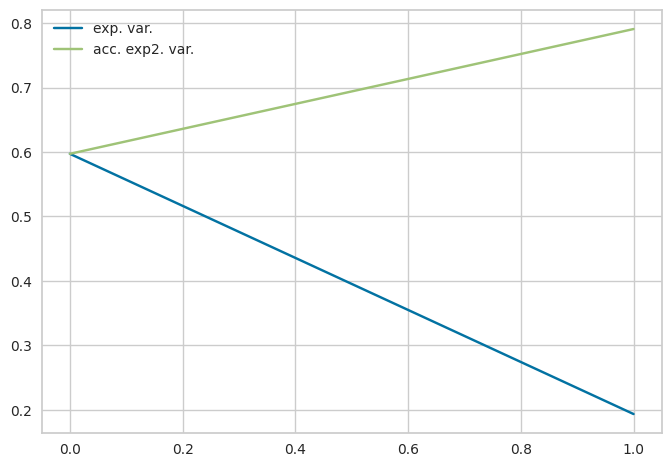

In [44]:
# 7. Plot explained variance and accumulated explained variance
exp_var_2=pca_var_2.explained_variance_ratio_
print(exp_var_2)
plt.plot(exp_var_2, label='exp. var.')
plt.plot(np.add.accumulate(exp_var_2), label='acc. exp2. var.')
plt.legend()
print(np.add.accumulate(exp_var_2))

In [45]:
# 8. Initializing k-means model on the PCA transformed data
kmeans_pca = KMeans(n_clusters=2, random_state=42, n_init=20, init='k-means++', max_iter=300, tol=0.0001)
clusters_pca = kmeans_pca.fit_predict(data_pca)
centroids_pca = kmeans_pca.cluster_centers_

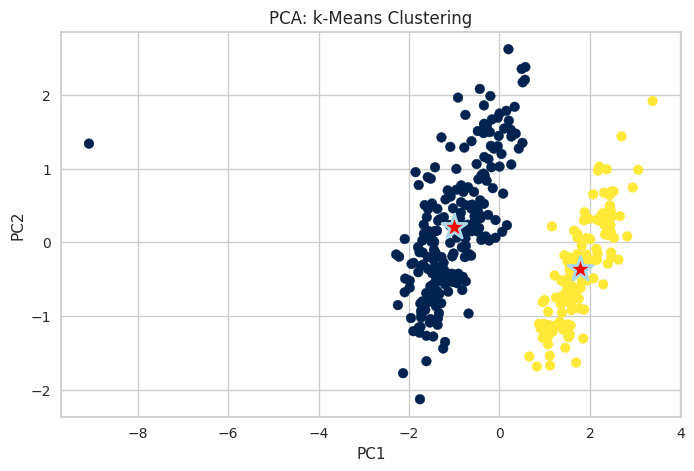

In [46]:
# 9. Plotting k-Means for PCA transformed data
plt.figure(figsize=(8, 5))
plt.scatter(data_pca.iloc[:, 0], data_pca.iloc[:, 1], c=clusters_pca, cmap='cividis')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='*', c='red', edgecolors='lightblue', linewidths=2, s=350)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA: k-Means Clustering')
plt.show()

<div class="alert alert-block alert-warning"> 
<b>Clustering Comparison</b>: 
Compare the two clusterings (on the plain data and on the PCA-transformed data) with respect to cluster memberships.
    
(Commented code + text/bullet points, add cells)
</div>

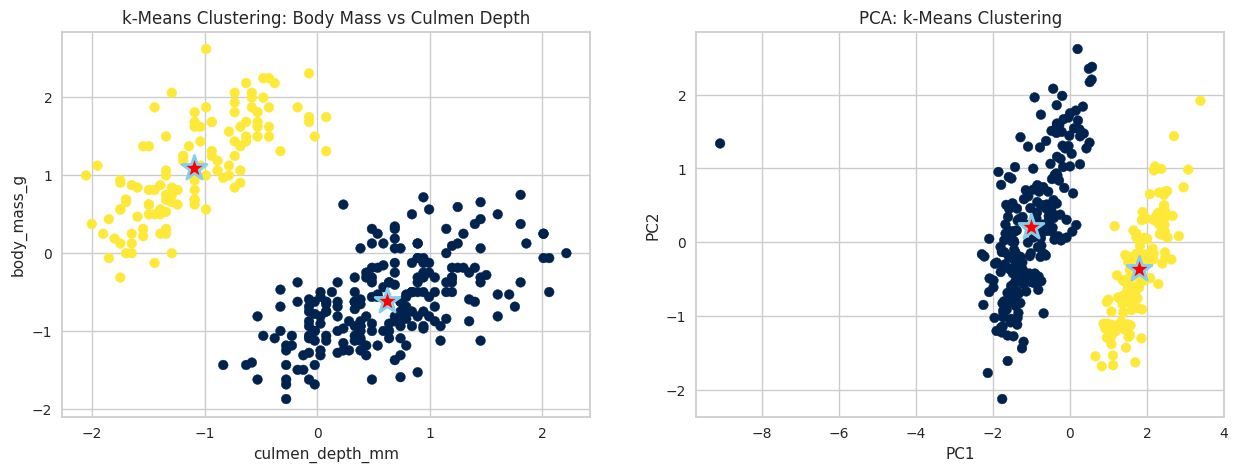

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plotting k-Means for plain data
axes[0].scatter(data_sc.culmen_depth_mm, data_sc.body_mass_g, c=clusters_2, cmap='cividis')
axes[0].scatter(centroids_2[:, 1], centroids_2[:, 3], marker='*', c='red', edgecolors='skyblue', linewidths=2, s=350)

axes[0].set_xlabel('culmen_depth_mm')
axes[0].set_ylabel('body_mass_g')
axes[0].set_title('k-Means Clustering: Body Mass vs Culmen Depth')

# Plotting k-Means for PCA-transformed data
axes[1].scatter(data_pca.iloc[:, 0], data_pca.iloc[:, 1], c=clusters_pca, cmap='cividis')
axes[1].scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='*', c='red', edgecolors='skyblue', linewidths=2, s=350)

axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('PCA: k-Means Clustering')

# Visualizing the results
plt.show()

<div class='alert alert-block alert-info'>

* PCA did not alter the cluster membership, the clusters in the original and PCA spaces correspond to the same points.

* The the visualizations appear different because PCA projects data into fewer dimensions.

* This suggests that important clustering information was retained in the PCs and PCA did not distort any significant information that would affect the clustering outcome.

</div>

# Interpretation
---
<div class="alert alert-block alert-warning"> 
<b>Cluster Descriptions</b>: 
Create tables and visuals for the description of clusters through feature. Interpret the results for the usecase.
    
(Commented code + text/bullet points, add cells)
</div>


## Task 7.1

<div class='alert alert-block alert-info'>

* Considering the k-Means clustering for K=2 on plain data.

</div>

In [48]:
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=20, init='k-means++', max_iter=300, tol=0.0001)
clusters_2 = kmeans_2.fit_predict(data_sc)
centroids_2 = kmeans_2.cluster_centers_

data_sc_copy = data_sc.copy()
data_sc_copy['clusters_k2'] = clusters_2

clusters_k2_mean = data_sc_copy.groupby('clusters_k2').mean()
clusters_k2_mean

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
clusters_k2,,,,
0,-0.369764,0.619343,-0.425146,-0.615195
1,0.655355,-1.097698,0.753511,1.090346


<div class='alert alert-block alert-info'>

* The table above clearly shows the differences in the mean of physical attributes of the penguins in the two clusters.

</div>

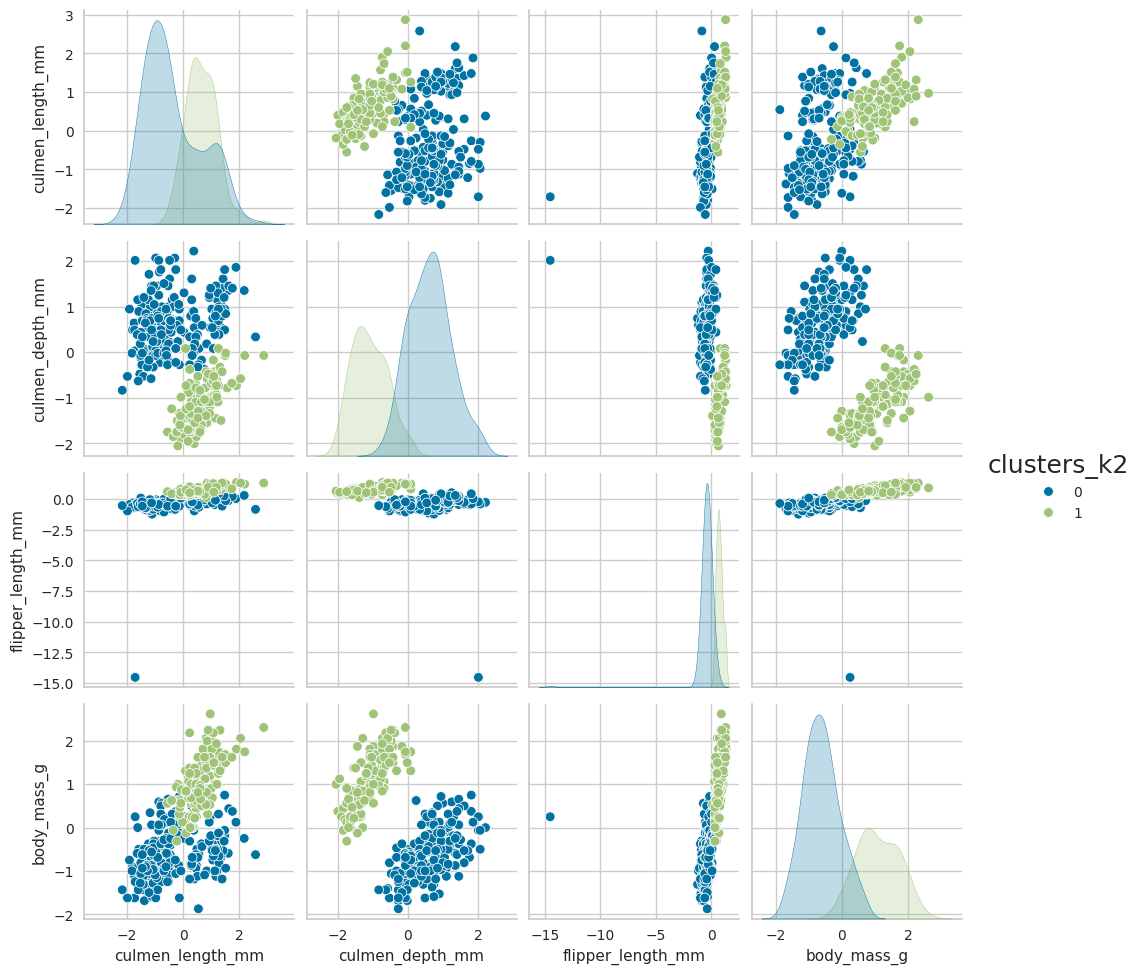

In [49]:
sns.pairplot(data_sc_copy, hue='clusters_k2')

<div class = 'alert alert-block alert-info'>

* For k=2 the algorithm has identified 2 clusters across all the features.

* Clear cluster formation is visible when one of features is `body_mass_g` which should also be considered for further work.

* As can be seen from the boxplot for `body_mass_g` vs `culmen_depth_mm` , the culmen depth for one with high body mass the culmen depth is relatively smaller then the other cluster with lower body mass.

</div>

# CONCLUSIONS
---

<div class="alert alert-block alert-warning"> 
<b>Conclusions</b>: 
Present conclusions etc. (See Task 7). Group your bulletpoints to respective headlines.
    
(Text/bullet points, this cell)

## Tasks 7.2 - 7.6 & 7.8 - 7.9

### 7.2  Summary of the achieved results

* The data was standardized and clustered using k-Means based on several physical characteristics.

* The algorithm predicted 2 clusters both on raw as well as PCA-reduced data.

* The PCA clustering did not significantly aler the cluster structure, confirming physical characteristics were sufficient for reliable clustering.

* The plain data showed two distinct clusters, one with heavier body mass and the other with large culmen depth.

* The clusters have been successful in pointing out the lack homogeneity amongst the penguins.

### 7.3 Results vs Expected Outcome

* The original motive behind undertaking this task was to find the existence of distinct clusters of penguins based on their physical characteristics, which might possibly be due to them belonging to distinct species.

* The results clearly show us the formation of atleast two distinct clusters based on the physical characteristics of penguins and thus have achieved the expected result.

### 7.4 How do the results help the organization specifically?

* As mentioned earlier, the original aim was to find clusters of penguins, if they existed, based on their physical characteristics.

* The results from task 5 clearly show us the presence of atleast 2 distinct clusters of penguins based on their physical attributes for both the plain as well as PCA-reduced data.

* From the purview of GEOMAR, this insight is greatly helpful in the organization's conservation efforts, as now we know that at least two varieties of penguins exists at the place from where the dataset taken and GEOMAR can now tailor its work as per requirements of these clusters individually.

* Furthermore, the clusters could also be used as inputs for future predictive models, e.g.: impact of climate change on penguin population based on how the clusters are affected by environmental factors.

### 7.5 Recommendations

* The research has provided the organization with valueable insights by revealing distinct groups amongst the penguin population based on their physical characteristics.

* GEOMAR can now form targeted strategies for their conservation efforts to ensure the required attention is given to the vulnerable group of the penguin population such as population monitoring. breeding porgrams, etc.

* Additionally, this also bolsters further research efforts of the organisation, whereby the organization can focus on the factors that contribute to the variations of the penguin species, e.g.: ecological factors, loss of habitat, presence of predators or other invasive species etc.

* Another recommendation would be to partner up with other similar local, non-local and international organisations to leverage their resources and expertise in the subject matter.

* GEOMAR should continue with such data-driven research which aids with their decision-making processes.

### 7.6 Limitations

* Although the original expected outcome mentioned cluster formation on the basis of species, the relevant information was not available in the dataset, thus calling for further refinement.

* The dataset is focused solely on a limited no. of physical traits, disregarding many other physical and non-physical attributes viz. height, migration patterns, food habits etc. which might have been more meaningful, thus risking overfitting.

* The size of the dataset is rather small thus limiting the scope of the findings.

* The k-Means clustering assumes spherical and equally sized clusters which might not represent the true structure of the data not accounting for the noise. PCA also did not add much value in this case.

### 7.8 Critical discussion

* Although, k-Means was selected due to its efficiency and straightforward implementation, it assumes spherical clusters, whereas DBSCAN would give better results by accounting varying densities.

* PCA was implemented to reduce the dimensionality which assumes linear relationships among the features which not always be true for real-world datasets. It did not greatly improve the clustering results as is apparent by very similar clustering results from PCA and plain data.

* Since the focus is on physical attributes of the penguins, more physical attributes could have been helpful viz. height, skeletal structure etc.

### 7.9 Critical reflection

* The original task was to find clusters based on physical characteristics of the penguins and possibly find the underlying species distribution.

* The research was successfully able to find clusters based on the physical characteristics.

* However no data on the species distribution was available, thus it might have been premature to include the species aspect of the birds due to the lack of data.

* Although PCA dimensionality reduction technique was a resonable step, the clustering did not significantly benefit from PCA since the original data itself was fairly well-separated in the feature space.

* The dataset was small in size, a better database including several other features such as biological or ecological data, could have been found which might have given better results.

</div>


# Future Work
---

<div class="alert alert-block alert-warning"> 
<b>Future Work</b>: 
Present three ideas for future work!
    
(3 bullet points, this cell)

* Incorporate non-physical chracteristics such as habitat conditions, availability of food, temperature conditions etc.

* Incorporate geographical data to track penguin movements.

* Consider applying the DBSCAN method in the formation of clusters to also account for noise.

</div>
